In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [3]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.shape

(569, 31)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target,
    test_size = 0.2, random_state = 2022
)

 - 모델정의

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


 - 모델설정

In [8]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [9]:
history = model.fit(X_train, y_train, validation_split =0.2,
                     epochs=100, batch_size=1000)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 58.5264 - accuracy: 0.6209 - val_loss: 38.2361 - val_accuracy: 0.6484
Epoch 2/100
1/1 [==============================] - 0s 86ms/step - loss: 43.4465 - accuracy: 0.6209 - val_loss: 26.5862 - val_accuracy: 0.6484
Epoch 3/100
1/1 [==============================] - 0s 69ms/step - loss: 30.2707 - accuracy: 0.6209 - val_loss: 15.4497 - val_accuracy: 0.6484
Epoch 4/100
1/1 [==============================] - 0s 95ms/step - loss: 17.7185 - accuracy: 0.6209 - val_loss: 5.2962 - val_accuracy: 0.6374
Epoch 5/100
1/1 [==============================] - 0s 73ms/step - loss: 6.1761 - accuracy: 0.6319 - val_loss: 4.8745 - val_accuracy: 0.3297
Epoch 6/100
1/1 [==============================] - 0s 132ms/step - loss: 4.8090 - accuracy: 0.3571 - val_loss: 9.0435 - val_accuracy: 0.3516
Epoch 7/100
1/1 [==============================] - 0s 90ms/step - loss: 8.5001 - accuracy: 0.3791 - val_loss: 11.5263 - val_accuracy: 0.3516
Epoch 8/100
1

In [10]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.2736 - accuracy: 0.9123


[0.27362555265426636, 0.9122806787490845]

In [11]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc) +1 )
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label = 'train_accuracy')
plt.plot(xs, y_vloss, label = 'validation_loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

In [14]:
model2 = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
model2.compile('adam', 'binary_crossentropy', ['accuracy'])

In [18]:
hist2= model2.fit(X_train2, y_train2, validation_split=0.2,
           epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0930 - val_accuracy: 0.9670
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0419 - accuracy: 0.9863 - val_loss: 0.0914 - val_accuracy: 0.9670
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0401 - accuracy: 0.9890 - val_loss: 0.0900 - val_accuracy: 0.9670
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0385 - accuracy: 0.9890 - val_loss: 0.0887 - val_accuracy: 0.9670
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0366 - accuracy: 0.9918 - val_loss: 0.0877 - val_accuracy: 0.9670
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0350 - accuracy: 0.9918 - val_loss: 0.0878 - val_accuracy: 0.9670
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0333 - accuracy: 0.9918 - val_loss: 0.0878 - val_accuracy: 0.9670
Epoch 8/100
4/4 [===

In [19]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 0.0635 - accuracy: 0.9825


[0.06349445879459381, 0.9824561476707458]

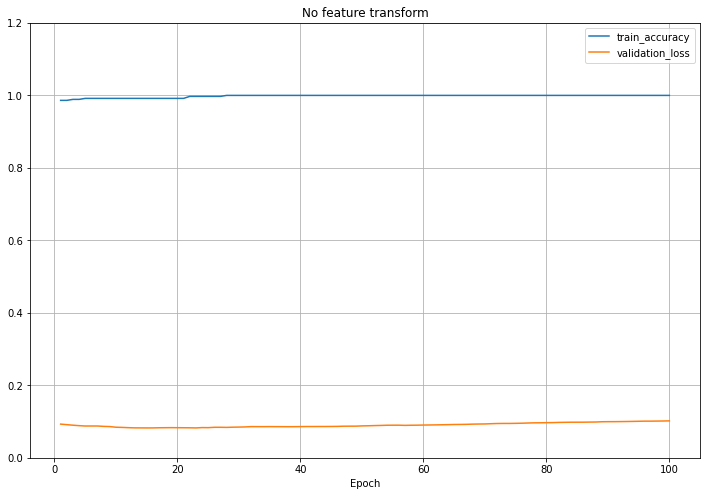

In [33]:

y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs = np.arange(1, len(y_acc2) +1 )
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc2, label = 'train_accuracy')
plt.plot(xs, y_vloss2, label = 'validation_loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

- 옵티마이저

In [25]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,
            epsilon=None, decay=0.0, amsgrad=False)


In [26]:
model.compile(adam, 'binary_crossentropy', ['accuracy'])

In [34]:
hist5 = model.fit(X_train2, y_train2, validation_split=0.2,
                  epochs=100, batch_size=100, verbose=0)

In [35]:
model.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.9561


[0.14968490600585938, 0.9561403393745422]

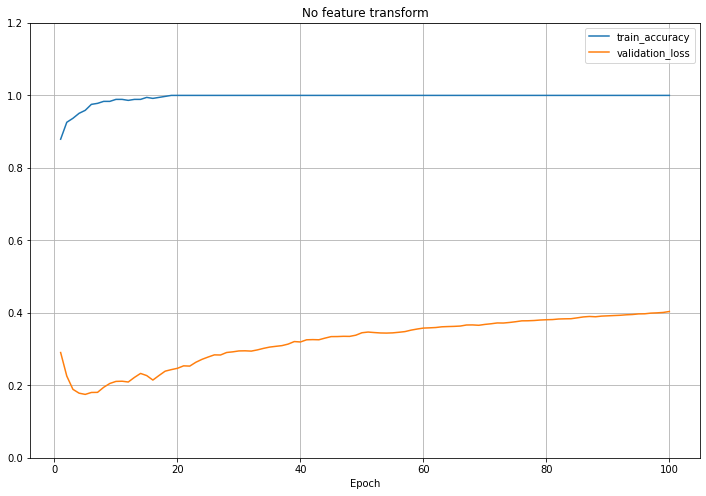

In [36]:
y_acc5 = hist5.history['accuracy']
y_vloss5 = hist5.history['val_loss']
xs = np.arange(1, len(y_acc5) +1 )
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc5, label = 'train_accuracy')
plt.plot(xs, y_vloss5, label = 'validation_loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [37]:
model3 = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [38]:
from tensorflow.keras.optimizers import RMSprop
rmsp = RMSprop(learning_rate=0.01, rho=0.9, epsilon=None, decay=0.0)

In [39]:
model3.compile(rmsp, 'binary_crossentropy', ['accuracy'])

In [40]:
hist6 = model3.fit(X_train2, y_train2, validation_split=0.2,
                   epochs=100, batch_size=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 0.3126 - accuracy: 0.7885 - val_loss: 0.1204 - val_accuracy: 0.9560 - 1s/epoch - 342ms/step
Epoch 2/100
4/4 - 0s - loss: 0.0717 - accuracy: 0.9725 - val_loss: 0.1359 - val_accuracy: 0.9341 - 49ms/epoch - 12ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.1039 - val_accuracy: 0.9670 - 44ms/epoch - 11ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0439 - accuracy: 0.9835 - val_loss: 0.1280 - val_accuracy: 0.9560 - 49ms/epoch - 12ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0317 - accuracy: 0.9918 - val_loss: 0.1373 - val_accuracy: 0.9451 - 53ms/epoch - 13ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.1158 - val_accuracy: 0.9670 - 50ms/epoch - 13ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0522 - accuracy: 0.9780 - val_loss: 0.1370 - val_accuracy: 0.9560 - 58ms/epoch - 15ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0296 - accuracy: 0.9918 - val_loss: 0.2009 - val_accuracy: 0.9231 - 52ms/epoch - 13ms/step
Epoch 9/100
4/4 - 0s - lo

In [41]:
model3.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9737


[0.2200298011302948, 0.9736841917037964]

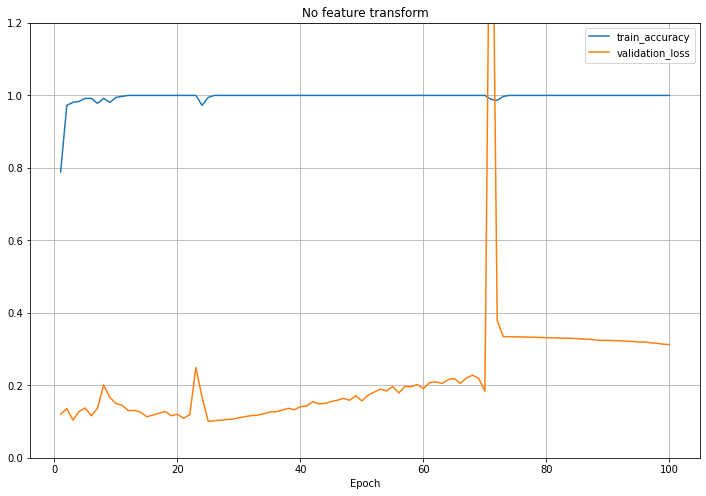

In [42]:
y_acc6 = hist6.history['accuracy']
y_vloss6 = hist6.history['val_loss']
xs = np.arange(1, len(y_acc6) +1 )
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc6, label = 'train_accuracy')
plt.plot(xs, y_vloss6, label = 'validation_loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

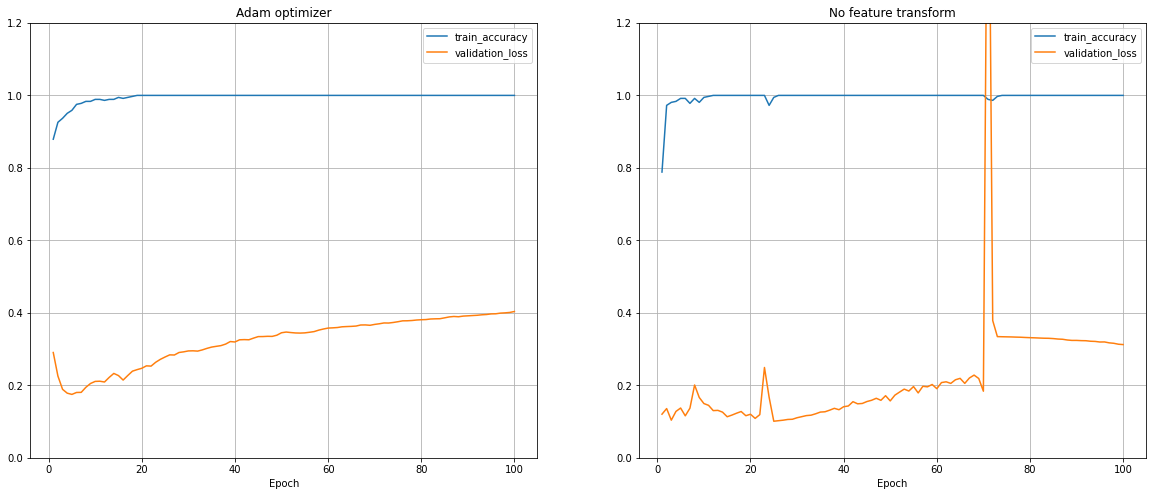

In [44]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.plot(xs, y_acc5, label = 'train_accuracy')
plt.plot(xs, y_vloss5, label = 'validation_loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.title('Adam optimizer')

plt.subplot(122)

plt.plot(xs, y_acc6, label = 'train_accuracy')
plt.plot(xs, y_vloss6, label = 'validation_loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')


plt.show()